In [1]:
import tensorflow as tf
import mlflow
import matplotlib.pyplot as plt

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.11.0


In [2]:
# #download the dataset
# mnist = tf.keras.datasets.mnist
# #import data from datasets

# (X_train, y_train), (X_test, y_test) = mnist.load_data()

# #converting values to 0<val<1
# X_train, X_test = X_train / 255.0, X_test / 255.0
# #if we dont normalize, it produces a bias

# ##WHAT is mnist dataset??
# #28x28 pixel images 

In [3]:
from numpy import save, load

In [4]:
# save('Inputdata/X_train.npy', X_train)
# save('Inputdata/y_train.npy', y_train)
# save('Inputdata/X_test.npy', X_test)
# save('Inputdata/y_test.npy', y_test)

In [5]:
X_train = load('Inputdata/X_train.npy')
y_train = load('Inputdata/y_train.npy')
X_test = load('Inputdata/X_test.npy')
y_test = load('Inputdata/y_test.npy')

In [30]:
input_data = {'X_train':'Inputdata/X_train.npy','y_train':'Inputdata/y_train.npy','X_test':'Inputdata/X_test.npy','y_test':'Inputdata/y_test.npy'}

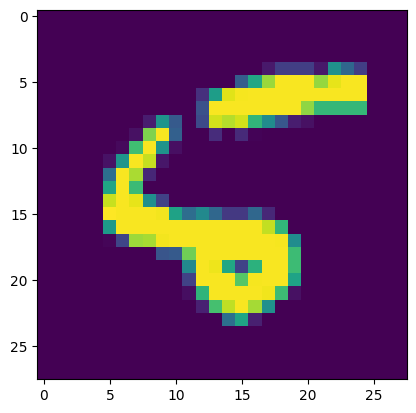

In [24]:
plt.imshow(X_test[8])

In [6]:
run_params={'loss':'sparse_categorical_crossentropy','optimizer':'adam','epochs':3}

# loss: poisson, kl_divergence, mean_squared_error, sparse_categorical_crossentropy
# optimizer: adam, Adadelta, SGD
# epoch: 3, 5, 7, 12

In [7]:
def training_basic_classifier(X_train,y_train,run_params):
    ##Build the machine learning model
    model = tf.keras.models.Sequential([
      tf.keras.layers.Flatten(input_shape=(28, 28)),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(10, activation='softmax')
    ])  
    
#     loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
#     loss_fn(y_train[:1], predictions).numpy()
    
    ##Use the `Model.fit` method to adjust your model parameters and minimize the loss: 
    model.compile(optimizer=run_params['optimizer'],
              loss=run_params['loss'],
              metrics=['accuracy','mse','mae'])
    history=model.fit(X_train,y_train, epochs=run_params['epochs'], validation_split=0.2)
    return  history, model

##WHAT is loss function?

In [8]:
def predict_on_test_data(model,X_test):
    y_pred = model.predict(X_test)
    return y_pred

In [9]:
def get_metrics(history):
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label = 'val')
    plt.ylabel('loss')
    plt.xlabel('Epochs')
    plt.legend()
    #plt.show()
    plt.savefig('loss.png')
    plt.clf()
    
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='val')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.legend()
    #plt.show()
    plt.savefig('Accuracy.png')
    plt.clf()
    
    plt.plot(history.history['mse'], label='train')
    plt.plot(history.history['val_mse'], label='val')
    plt.ylabel('Mean Squared Error')
    plt.xlabel('Epochs')
    plt.legend()
    #plt.show()
    plt.savefig('Mean Squared Error.png')
    plt.clf()
    
    plt.plot(history.history['mae'],'ro', label='train')
    plt.plot(history.history['val_mae'],'ro', label='val')
    plt.ylabel('Mean Absolute error')
    plt.xlabel('Epochs')
    plt.legend()
    #plt.show()
    plt.savefig('Mean Absolute error.png')
    return {'loss':history.history['loss'],'val_loss':history.history['val_loss'],'accuracy':history.history['accuracy'],'val_accuracy':history.history['val_accuracy'],
            'mse':history.history['mse'],'val_mse':history.history['val_mse'],'mae':history.history['mae'],'val_mae':history.history['val_mae']}
    

In [10]:
history, model = training_basic_classifier(X_train,y_train,run_params)

Epoch 1/3
1500/1500 [==============================] - 6s 3ms/step - loss: 0.3236 - accuracy: 0.9074 - mse: 27.3617 - mae: 4.3699 - val_loss: 0.1632 - val_accuracy: 0.9551 - val_mse: 27.4383 - val_mae: 4.3890
Epoch 2/3
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1567 - accuracy: 0.9529 - mse: 27.3717 - mae: 4.3699 - val_loss: 0.1214 - val_accuracy: 0.9642 - val_mse: 27.4415 - val_mae: 4.3890
Epoch 3/3
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1165 - accuracy: 0.9645 - mse: 27.3740 - mae: 4.3699 - val_loss: 0.1019 - val_accuracy: 0.9717 - val_mse: 27.4431 - val_mae: 4.3890


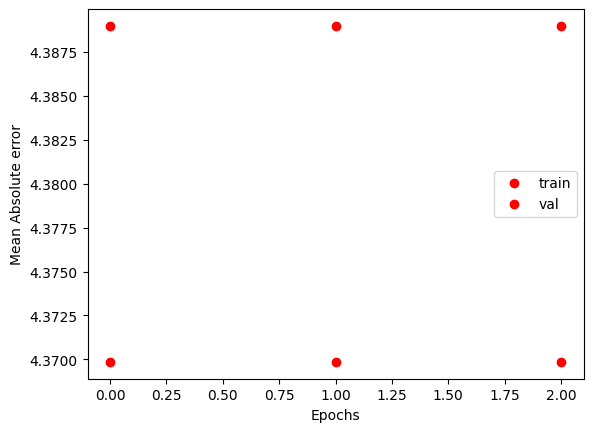

In [11]:
run_metrics = get_metrics(history)

In [12]:
# import numpy as np
# y_pred = predict_on_test_data(model,X_test)
# #print(y_pred)
# y_=[]
# for i in y_pred:
#     p = np.argmax(i)
#     y_.append(p)

    
# for i in y_:
#     print(i)
#     plt.imshow(X_test[i])    
#     print("#"*10)


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [37]:
###MLFLOW PART

experiment_name='tensorflowExperiment'
run_name='tensorflowRun'
mae_path='Mean Absolute error.png'
mse_path='Mean Squared Error.png'
loss_path='loss.png'
accuracy_path='Accuracy.png'
input_path='Inputdata'

In [40]:
def create_experiment(experiment_name,run_name, run_metrics,model, input_path = None ,mae_path = None, mse_path = None,loss_path = None,
                      accuracy_path = None, run_params=None):
    import mlflow
    mlflow.set_tracking_uri("http://localhost:5000") #uncomment this line if you want to use any database like sqlite as backend storage for model
    mlflow.set_experiment(experiment_name)
    
    with mlflow.start_run(run_name=run_name):
        
        if not run_params == None:
            for param in run_params:
                mlflow.log_param(param, str(run_params[param]))
            
        for metric in run_metrics:
            mlflow.log_metric(metric, run_metrics[metric][-1])#choosing the last epoc value for each metric
            
        mlflow.tensorflow.log_model(model, "model")
        
        if not mae_path == None:
            mlflow.log_artifact(mae_path, 'Mean Absolute Error')
            
        if not mse_path == None:
            mlflow.log_artifact(mse_path, "Mean Square Error")
            
        if not loss_path == None:
            mlflow.log_artifact(loss_path, "Loss")
            
        if not accuracy_path == None:
            mlflow.log_artifact(accuracy_path, "Accuracy")
        if not input_path == None:
            mlflow.log_artifact(input_path)
#         mlflow.set_tag("tag1", "Random Forest")
#         mlflow.set_tags({"tag2":"Randomized Search CV", "tag3":"Production"})
            
    print('Run - %s is logged to Experiment - %s' %(run_name, experiment_name))

In [41]:
create_experiment(experiment_name=experiment_name,run_metrics=run_metrics,run_name=run_name,model=model,mae_path=mae_path,mse_path=mse_path,loss_path=loss_path,accuracy_path=accuracy_path,run_params=run_params,input_path=input_path)


2023/01/23 13:49:49 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: C:\Users\Admin\AppData\Local\Temp\tmpohkckx4e\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\Admin\AppData\Local\Temp\tmpohkckx4e\model\data\model\assets


Run - tensorflowRun is logged to Experiment - tensorflowExperiment


In [17]:
y_pred=predict_on_test_data(model,X_test)

313/313 [==============================] - 1s 1ms/step


In [18]:
import numpy as np
# ytest= y_test
# y_test=[]
# for i in ytest:
#     y_test.append(i)
    

# print(y_test)
# print(y_pred)
y_=[]
for i in y_pred:
    p = np.argmax(i)
    y_.append(p)
    
# print(len(y_test))
# #print(shape(y_test))
# print(len(y_pred))  
#wrong=0
indicesplus=[]
for i in range(len(y_pred)):
    if y_test[i]!=y_[i]:
        lol=[]
        lol.append(i)
        lol.append(y_test[i])
        lol.append(y_[i])
#         print(y_test[i])
#         print(y_[i])
#         print("&&& "*10)
        indicesplus.append(lol)


print("wrong answers:",indicesplus)

#plt.imshow(X_test[8])

wrong answers: [[8, 5, 6], [233, 8, 7], [247, 4, 2], [259, 6, 0], [321, 2, 7], [340, 5, 3], [381, 3, 7], [445, 6, 0], [495, 8, 2], [531, 3, 2], [582, 8, 2], [591, 8, 3], [610, 4, 2], [684, 7, 2], [691, 8, 4], [707, 4, 9], [717, 0, 6], [740, 4, 9], [810, 7, 2], [844, 8, 7], [882, 9, 7], [924, 2, 7], [947, 8, 9], [950, 7, 2], [951, 5, 4], [956, 1, 2], [962, 9, 7], [965, 6, 0], [1014, 6, 5], [1032, 5, 8], [1039, 7, 2], [1044, 6, 8], [1107, 9, 3], [1112, 4, 6], [1181, 6, 1], [1182, 6, 8], [1194, 7, 9], [1206, 7, 2], [1226, 7, 2], [1232, 9, 4], [1242, 4, 9], [1247, 9, 3], [1260, 7, 1], [1283, 7, 2], [1289, 5, 9], [1299, 5, 7], [1319, 8, 3], [1325, 8, 2], [1326, 7, 2], [1364, 8, 2], [1393, 5, 3], [1425, 8, 4], [1500, 7, 1], [1522, 7, 9], [1527, 1, 6], [1530, 8, 7], [1549, 4, 6], [1553, 9, 3], [1609, 2, 6], [1621, 0, 6], [1681, 3, 7], [1709, 9, 3], [1717, 8, 0], [1751, 4, 2], [1754, 7, 2], [1790, 2, 7], [1828, 3, 7], [1843, 0, 2], [1850, 8, 3], [1878, 8, 2], [1901, 9, 4], [1938, 4, 6], [1941,

In [19]:
# single = X_test[74]
# print(X_test.shape)

In [20]:
len(indicesplus)/10000 - 1

-0.9707

In [21]:
# #predict_on_test_data(model,single)
# model.predict(single)